#Bar Graph

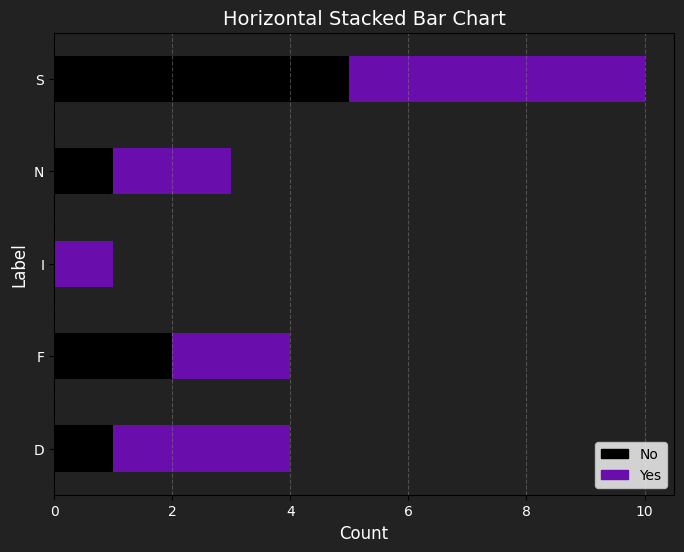

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
file_url = "https://raw.githubusercontent.com/Haratoooo/PLOTS/main/bar_assignment.csv"
df = pd.read_csv(file_url)

# Transform COUNT values (1 -> 'Yes', 0 -> 'No')
df['COUNT'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Pivot data to get counts per LABEL category
transformed_data = df.groupby(['LABEL', 'COUNT']).size().unstack(fill_value=0)

# Colors
colors = ['#000000', '#6a0dad']  # Black for "No", Purple for "Yes"

# Plot
ax = transformed_data.plot(kind='barh', stacked=True, color=colors, figsize=(8, 6))

# Create custom legend handles
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
labels = ["No", "Yes"]  # Manually set correct order

# Chart customization
plt.xlabel("Count", fontsize=12, color='white')
plt.ylabel("Label", fontsize=12, color='white')
plt.title("Horizontal Stacked Bar Chart", fontsize=14, color='white')
plt.legend(handles, labels, fontsize=10)  # Use custom legend
plt.grid(axis='x', linestyle='--', alpha=0.5, color='gray')

# Dark theme background
ax.set_facecolor('#222222')  # Dark gray background
plt.gcf().set_facecolor('#222222')  # Background for the entire figure
plt.xticks(color='white')
plt.yticks(color='white')

# Show
plt.show()

# plt.savefig("bar_chart.png", dpi=300, bbox_inches='tight')
# files.download("bar_chart.png")


#Sankey Graph

In [17]:
import pandas as pd
import plotly.graph_objects as go

# Dataset
file_url = "https://raw.githubusercontent.com/Haratoooo/PLOTS/main/sankey_assignment.csv"
df = pd.read_csv(file_url)

sources = df.columns[1:9].tolist()
middle = df["LABEL"].unique().tolist()
targets = df.columns[9:].tolist()

# label list
labels = sources + middle + targets

source_to_middle_links = []
middle_to_target_links = []

for _, row in df.iterrows():
    middle_node = row["LABEL"]

    for source in sources:
        value = row[source]
        if value > 0:
            source_to_middle_links.append((source, middle_node, value))

    for target in targets:
        value = row[target]
        if value > 0:
            middle_to_target_links.append((middle_node, target, value))

all_links = source_to_middle_links + middle_to_target_links

sources_indices = [labels.index(source) for source, target, _ in all_links]
targets_indices = [labels.index(target) for source, target, _ in all_links]
values = [value for _, _, value in all_links]

node_colors = ['#6a0dad' if label in sources else '#808080' if label in middle else '#000000' for label in labels]
link_colors = ['rgba(106,13,173,0.5)' for _ in range(len(sources_indices))]

# Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=sources_indices,
        target=targets_indices,
        value=values,
        color=link_colors
    )
))


fig.update_layout(
    title_text="Sankey Diagram",
    font=dict(size=14, color='white'),
    paper_bgcolor='black'
)

# Show
fig.show()

# plt.savefig("sankey_diagram.png", dpi=300, bbox_inches='tight')
# files.download("sankey_diagram.png")


Network Graph

Saving networks_assignment.to_csv to networks_assignment.to_csv


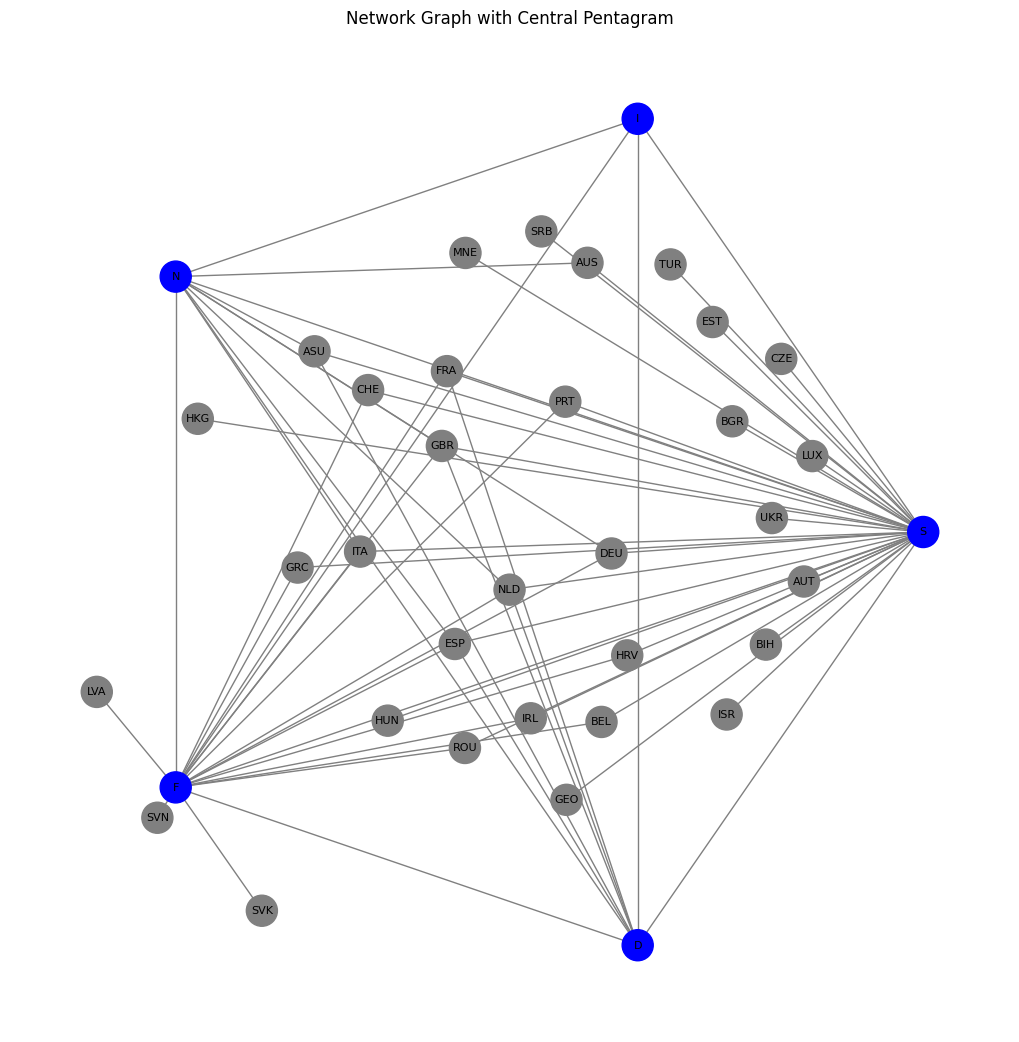

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file (ensure file is uploaded in Google Colab)
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, index_col=0)

# Create a graph
G = nx.Graph()

# Define node categories
central_nodes = {'D', 'F', 'I', 'N', 'S'}
blue_nodes = central_nodes
green_nodes = {'BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA'}
yellow_nodes = {'AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL',
                'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP'}

# Add nodes with attributes
for node in df.index:
    if node in blue_nodes:
        G.add_node(node, color='blue')
    elif node in green_nodes:
        G.add_node(node, color='green')
    elif node in yellow_nodes:
        G.add_node(node, color='yellow')
    else:
        G.add_node(node, color='gray')  # Default color

# Add edges based on the adjacency matrix
for node1 in df.index:
    for node2 in df.columns:
        if df.loc[node1, node2] > 0:  # Add edge if connection exists
            G.add_edge(node1, node2, weight=df.loc[node1, node2])

# Get positions: central pentagram for specific nodes
angle = np.linspace(0, 2*np.pi, 6)[:-1]  # Angles for 5 points
pentagram_positions = {node: (np.cos(a), np.sin(a)) for node, a in zip(central_nodes, angle)}

# Spread other nodes outside
external_positions = nx.spring_layout(G, seed=42)  # Initial layout
for node in pentagram_positions:
    external_positions.pop(node, None)  # Remove central nodes from spring layout

# Merge layouts
positions = {**pentagram_positions, **external_positions}

# Ensure all nodes have color attributes
for node in G.nodes:
    if 'color' not in G.nodes[node]:
        G.nodes[node]['color'] = 'gray'  # Assign default color

# Draw the graph
plt.figure(figsize=(10, 10))
colors = [G.nodes[n]['color'] for n in G.nodes]
nx.draw(G, pos=positions, with_labels=True, node_color=colors, edge_color='gray', node_size=500, font_size=8)

# Show the graph
plt.title("Network Graph with Central Pentagram")
plt.show()

plt.savefig("network_graph.png", dpi=300, bbox_inches='tight')
files.download("network_graph.png")
